In [1]:
## Script to generate randomized txt files for Catch the critter - Long experiment

In [2]:
# Create a txt file with tab delimited numbers as follows (36 long, 0's for random trials)
# targetID1 targetID2 xloc1 yloc1 xloc2 yloc2 delay1 delay2
# target ID can be 1,2,3
# x, y random pick between 100-400 [check this with presentation script], balanced by visual field (also within a trial one on each side)
# delay can be 2000, 3200, 5000, needs to be balanced

In [3]:
import numpy as np
import pandas as pd

paramNum = 'i10'

In [4]:
# Pixel value range
x = [100, 300]


# Set up coordinates and balance
balanceLR = np.array([1,1,1,1, -1,-1,-1,-1,])
balanceHL1 = np.array([1,1,1,1,-1,-1,-1,-1])
balanceHL2 = np.array([1,1,1,1,-1,-1,-1,-1])

np.random.shuffle(balanceLR)
np.random.shuffle(balanceHL1)
np.random.shuffle(balanceHL2)

balanceLR1 = balanceLR
balanceLR2 = -1*balanceLR

# draw random values 
randX1 = np.around((np.random.rand(8)*(x[1]-x[0]) + x[0])*balanceLR1, decimals = 0)
randX2 = np.around((np.random.rand(8)*(x[1]-x[0]) + x[0])*balanceLR2, decimals = 0)
randY1 = np.around((np.random.rand(8)*(x[1]))*balanceHL1, decimals = 0)
randY2 = np.around((np.random.rand(8)*(x[1]))*balanceHL2, decimals = 0)

In [5]:
# To create equal numbers of animals in the first presentation and the second presentation, we need to write a 2D matrix (1,2,3,4) by (1,2,3,4)
# We can pick combinations (i.e. first row: 1,1; 1,2; 1,3; 1,4) in this 2D matrix in the off diagonals (no two of the same animals in one trial)
# to balance the critter numbers. This gives us three groups (a,b,c) of four combo's that are balanced:
#   1 2 3 4
# 1 x a b c
# 2 c x a b
# 3 b c x a
# 4 a b c x

targetID_a = np.matrix('1,2; 2,3; 3,4; 4,1')
targetID_b = np.matrix('1,3; 2,4; 3,1; 4,2')
targetID_c = np.matrix('1,4; 2,1; 3,2; 4,3')

# only two out of three can be used for the predictable scenes (since there is a total of 8)
# randomly pick which one to leave out
picks = [1,2,3]
np.random.shuffle(picks)
if picks[0] == 1:
    targetID = np.concatenate((targetID_b, targetID_c), axis = 0)
    print(targetID)

elif picks[0] == 2:
    targetID = np.concatenate((targetID_a, targetID_c), axis = 0)
    print(targetID)
else:
    targetID = np.concatenate((targetID_a, targetID_b), axis = 0)
    print(targetID)
    

[[1 2]
 [2 3]
 [3 4]
 [4 1]
 [1 3]
 [2 4]
 [3 1]
 [4 2]]


In [6]:
# Target identity
#tmpID = np.matrix('1,2; 1, 3; 1,4 ; 2, 1; 2, 3; 2, 4; 3, 1; 3, 2; 3, 4; 4, 1; 4, 2; 4, 3')
#targetID = tmpID#np.tile(tmpID, (2,1)) # 24 total

#Set up delays matrix and randomize
tmpD = np.matrix('2000, 3200')
delays = np.repeat(tmpD, 12, axis = 0)

rng_state = np.random.get_state()
np.random.shuffle(delays)
np.random.set_state(rng_state)
np.random.shuffle(targetID) # not really relevant anymore but leaving it in in case we change the time-windows again
#np.random.shuffle(delays)
#np.random.shuffle(targetID)


In [7]:
# Generate random vs predictable trials

randScenes = np.array([0,1])
randScenes = np.repeat(randScenes, 8)
np.random.shuffle(randScenes)

In [8]:
randScenes

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [9]:
# generate final matrix
num = 0
trialInfo = np.zeros((16, 8))
for i in range(16):
    if randScenes[i]:
        trialInfo[i, 0] = targetID[num, 0]
        trialInfo[i, 1] = targetID[num, 1]
        trialInfo[i, 2] = randX1[num]
        trialInfo[i, 3] = randY1[num]
        trialInfo[i, 4] = randX2[num]
        trialInfo[i, 5] = randY2[num]
        trialInfo[i, 6] = delays[num, 0]
        trialInfo[i, 7] = delays[num, 1]
        num += 1
#np.around(trialInfo, decimals = 0)
trialInfo.astype(int)
print(trialInfo.astype(int))


[[   2    4 -113 -284  102   -1 2000 3200]
 [   1    2 -287    9  136 -272 2000 3200]
 [   3    4  178   -6 -104  158 2000 3200]
 [   0    0    0    0    0    0    0    0]
 [   1    3  136  280 -204  146 2000 3200]
 [   3    1 -149  285  139  286 2000 3200]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   2    3  169 -164 -117 -225 2000 3200]
 [   4    1 -180 -186  220   98 2000 3200]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   4    2  189  191 -178 -177 2000 3200]]


In [10]:
# save file

np.savetxt('target8ParamsP' + paramNum + '.txt', trialInfo, delimiter = '\t', fmt = '%i')

In [11]:
# Create random scene parameter entries: 
randN = 8 # Number of blocks (always do more than you plan to use) Note to update .txt files when changing block size!
trialRand = np.zeros((randN*8, 8))
num2 = 0

if np.random.rand(1) > 0.5: 
    picks2 = [1,0,1,0,1,0,1,0]
else: 
    picks2 = [0,1,0,1,0,1,0,1]
    
    
for j in range(randN):
    # Produce randomized targets and coordinates
    np.random.shuffle(balanceLR)
    np.random.shuffle(balanceHL1)
    np.random.shuffle(balanceHL2)
    #np.random.shuffle(targetRand)
    
    if picks2[j]:
        if picks[0] == 1:
            targetRand = np.concatenate((targetID_a, targetID_c), axis = 0)
            

        elif picks[0] == 2:
            targetRand = np.concatenate((targetID_b, targetID_a), axis = 0)
    
        else:
            targetRand = np.concatenate((targetID_c, targetID_b), axis = 0)
    
    else:
        if picks[0] == 1:
            targetRand = np.concatenate((targetID_a, targetID_b), axis = 0)
            

        elif picks[0] == 2:
            targetRand = np.concatenate((targetID_b, targetID_c), axis = 0)
    
        else:
            targetRand = np.concatenate((targetID_c, targetID_a), axis = 0)
            
            

    balanceLR1 = balanceLR
    balanceLR2 = -1*balanceLR

    # draw random values 
    randX1r = np.around((np.random.rand(8)*(x[1]-x[0]) + x[0])*balanceLR1, decimals = 0)
    randX2r = np.around((np.random.rand(8)*(x[1]-x[0]) + x[0])*balanceLR2, decimals = 0)
    randY1r = np.around((np.random.rand(8)*(x[1]) )*balanceHL1, decimals = 0)
    randY2r = np.around((np.random.rand(8)*(x[1]) )*balanceHL2, decimals = 0)
    
    np.random.shuffle(targetRand)
    
    for k in range(8): 
        trialRand[num2,0] = targetRand[k,0]
        trialRand[num2,1] = targetRand[k,1]
        trialRand[num2,2] = randX1r[k]
        trialRand[num2,3] = randY1r[k]
        trialRand[num2,4] = randX2r[k]
        trialRand[num2,5] = randY2r[k]
        trialRand[num2,6] = delays[k,0]
        trialRand[num2,7] = delays[k,1]
        num2 += 1
        
trialRand.astype(int)
print(trialRand.astype(int))

[[   3    1 -267 -220  257  -75 2000 3200]
 [   2    4 -117   81  225 -135 2000 3200]
 [   2    1  199  252 -298  258 2000 3200]
 [   4    3 -173 -253  113   22 2000 3200]
 [   1    4  168 -116 -177  -52 2000 3200]
 [   3    2  287  -46 -191 -118 2000 3200]
 [   4    2 -162  174  121    7 2000 3200]
 [   1    3  266  263 -152  249 2000 3200]
 [   1    2  182  264 -236   97 2000 3200]
 [   1    4 -295 -111  118  240 2000 3200]
 [   2    1  135 -267 -300  -26 2000 3200]
 [   3    2 -178    4  142 -199 2000 3200]
 [   4    3 -129 -214  130    0 2000 3200]
 [   3    4  102  -41 -130  120 2000 3200]
 [   4    1  283  214 -181  -55 2000 3200]
 [   2    3 -112   22  205 -187 2000 3200]
 [   1    3 -128 -268  296   73 2000 3200]
 [   4    2  275   41 -102  107 2000 3200]
 [   4    3  153  -48 -266 -178 2000 3200]
 [   2    1 -121   52  265  272 2000 3200]
 [   2    4  167 -134 -189   -1 2000 3200]
 [   3    1  107 -230 -130 -218 2000 3200]
 [   3    2 -210  110  272  153 2000 3200]
 [   1    4

In [12]:
np.savetxt('target8RandParamsP'+ paramNum + '.txt', trialRand, delimiter = '\t', fmt = '%i')

(array([128.,   0.,  64.,   0.,   0.,  64.,   0.,  64.,   0.,  64.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

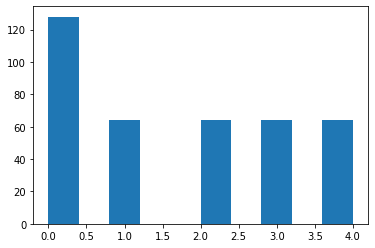

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
trialRand[:,0]
newList = np.concatenate((trialRand[:,0], trialRand[:,1], np.tile(trialInfo[:,0], 8), np.tile(trialInfo[:,1], 8)))

plt.hist(newList)



In [14]:
# Check distribution of animals left and right



In [15]:
# Create random scene parameter entries: 
randN = 8 # Number of blocks (always do more than you plan to use) Note to update .txt files when changing block size!
trialRand = np.zeros((randN*8, 8))
num2 = 0

if np.random.rand(1) > 0.5: 
    picks2 = [1,0,1,0,1,0,1,0]
else: 
    picks2 = [0,1,0,1,0,1,0,1]

for j in range(randN):
    
    if picks2[j]:
        if picks[0] == 1:
            targetRand = np.concatenate((targetID_a, targetID_c), axis = 0)
            

        elif picks[0] == 2:
            targetRand = np.concatenate((targetID_b, targetID_a), axis = 0)
    
        else:
            targetRand = np.concatenate((targetID_c, targetID_b), axis = 0)
    
    else:
        if picks[0] == 1:
            targetRand = np.concatenate((targetID_a, targetID_b), axis = 0)
            

        elif picks[0] == 2:
            targetRand = np.concatenate((targetID_b, targetID_c), axis = 0)
    
        else:
            targetRand = np.concatenate((targetID_c, targetID_a), axis = 0)
    
    # Produce randomized targets and coordinates
    np.random.shuffle(balanceLR)
    np.random.shuffle(balanceHL1)
    np.random.shuffle(balanceHL2)

    balanceLR1 = balanceLR
    balanceLR2 = -1*balanceLR

    # draw random values 
    randX1r = np.around((np.random.rand(8)*(x[1]-x[0]) + x[0])*balanceLR1, decimals = 0)
    randX2r = np.around((np.random.rand(8)*(x[1]-x[0]) + x[0])*balanceLR2, decimals = 0)
    randY1r = np.around((np.random.rand(8)*(x[1]) )*balanceHL1, decimals = 0)
    randY2r = np.around((np.random.rand(8)*(x[1]) )*balanceHL2, decimals = 0)
    
    np.random.shuffle(targetRand)
    
    for k in range(8): 
        trialRand[num2,0] = targetRand[k,0]
        trialRand[num2,1] = targetRand[k,1]
        trialRand[num2,2] = randX1r[k]
        trialRand[num2,3] = randY1r[k]
        trialRand[num2,4] = randX2r[k]
        trialRand[num2,5] = randY2r[k]
        trialRand[num2,6] = delays[k,0]
        trialRand[num2,7] = delays[k,1]
        num2 += 1
        
trialRand.astype(int)
print(trialRand.astype(int))

np.savetxt('target8RandParamsOP' + paramNum+ '.txt', trialRand, delimiter = '\t', fmt = '%i')

[[   1    2 -127 -287  294  286 2000 3200]
 [   3    2 -160  153  245   31 2000 3200]
 [   3    4  195  -11 -177 -112 2000 3200]
 [   1    4 -235  131  208 -259 2000 3200]
 [   4    1 -219  -27  120  -92 2000 3200]
 [   2    1  225  135 -221  228 2000 3200]
 [   2    3  139 -128 -235  120 2000 3200]
 [   4    3  118   42 -246  -51 2000 3200]
 [   4    3 -267  264  113   65 2000 3200]
 [   2    4 -263  275  242 -280 2000 3200]
 [   3    2 -124   23  130   44 2000 3200]
 [   1    4 -137 -142  237 -203 2000 3200]
 [   2    1  284  -96 -223 -232 2000 3200]
 [   3    1  164  -91 -204 -229 2000 3200]
 [   1    3  168  -55 -206  206 2000 3200]
 [   4    2  127  154 -224  222 2000 3200]
 [   4    1 -118  155  108  228 2000 3200]
 [   1    2  180 -282 -253 -275 2000 3200]
 [   2    1 -238   35  212  265 2000 3200]
 [   3    4  121  -20 -205   88 2000 3200]
 [   2    3  249  -14 -277  187 2000 3200]
 [   1    4 -174  -52  183 -205 2000 3200]
 [   3    2 -149   54  239 -199 2000 3200]
 [   4    3